# Total COVID-19 deaths for different countries

Script produced by [Laurent Lessard](https://laurentlessard.com)

---

### Import data from JHU CSSE

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import datetime

mpl.rcParams['figure.dpi'] = 120

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_raw = pd.read_csv(url)

### Reformat data into convenient form

In [5]:
colnames = df_raw.columns

# aggregate by region
df = df_raw.pivot_table(index='Country/Region',values=colnames[4:],aggfunc=sum)

# make countries columns rather than rows
df = df.T

# make the index a datetime object
df.index = pd.to_datetime(df.index)

# sort the dates/times
df.sort_index(inplace=True)

# record the latest date
latest_date = df.index[-1]
latest_date_str = latest_date.strftime("%a %b %d, %Y")
print(latest_date_str)

Sat May 29, 2021


### Plot daily deaths

NameError: name 'data_len' is not defined

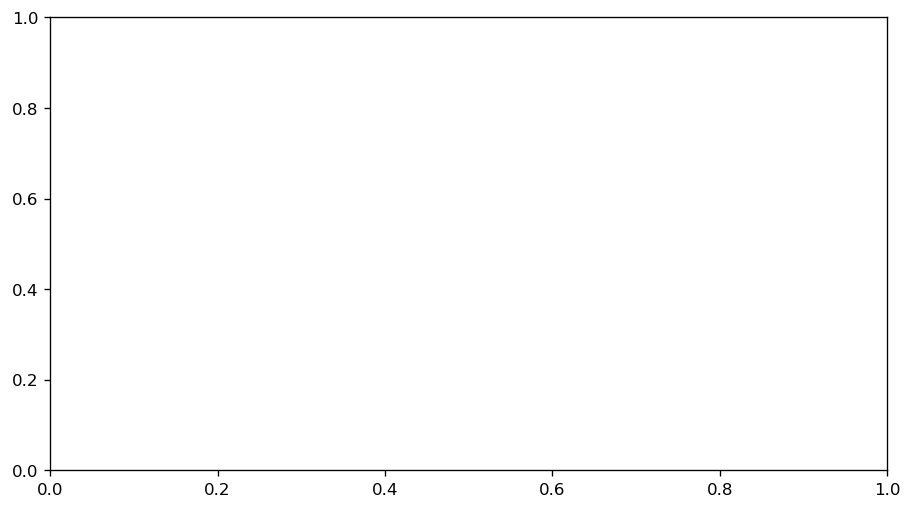

In [6]:
fig = plt.figure(figsize=(9,5))
ax = plt.gca()

# selected countries
countries = ['US']
min_deaths = 10

# shift data so that index corresponds to days since min_death deaths.
# shifted_data = shift_data( countries, min_deaths )
# data_len = max([len(dat) for dat in shifted_data])

xmax = data_len

t = np.array(range(data_len))

K = 750
zeta = 0.1
wn = np.pi/55
wd = np.sqrt(1-zeta**2) * wn
phi = np.arccos(zeta)

# for data in shifted_data:
color = next(ax._get_lines.prop_cycler)['color']
plt.plot( df['US'].diff(), marker=".", label=None, color=color, alpha=0.2 )
plt.plot( df['US'].diff().rolling(7).mean(), marker="", label='US', color=color, linewidth=2 )
#     plt.plot( K*(1 - 1/np.sqrt(1-zeta**2) * np.exp(-zeta*wn*t) * np.sin( wd*t + phi )), label="second-order step response")

# make plot
ax.set_title("Daily COVID-19 deaths in the US (with 7-day moving average)")
# ax.legend(loc="upper left")

ax.set_xlim(xmin = datetime.date(2020, 3, 1), xmax = latest_date )
ax.set_ylim(ymin=0,ymax=2500)

# ax.set_xlabel("Date")
ax.set_ylabel("Daily deaths")
ax.grid()

fig.autofmt_xdate()
date_format = "%b %d"
ax.xaxis.set_major_formatter(DateFormatter(date_format))
    
plt.tight_layout(pad=0)
# plt.savefig("figures/world_daily_deaths_vs_time.png")